In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import tinyDA as tda

In [2]:
b = 1
m = 2
x = np.linspace(0,1)
y_pure = b + m*x

sigma = 0.1
y = y_pure + np.random.normal(scale=sigma, size=x.shape[0])

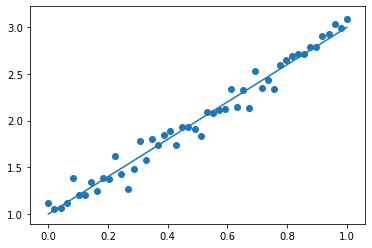

In [3]:
plt.plot(x, y_pure)
plt.scatter(x, y)
plt.show()

In [4]:
mean_prior = np.zeros(2)
cov_prior = np.eye(2)
cov_likelihood = sigma**2*np.eye(x.shape[0])

my_prior = multivariate_normal(mean_prior, cov_prior)
my_loglike = tda.LogLike(y, cov_likelihood)

In [5]:
class MyLinkFactory(tda.LinkFactory):
    def evaluate_model(self, parameters):
        output = parameters[0] + parameters[1]*x
        qoi = None
        return output, qoi

In [6]:
my_link_factory = MyLinkFactory(my_prior, my_loglike)

In [7]:
#rwmh_cov = np.eye(2)
#rmwh_scaling = 0.1
#rwmh_adaptive = True
#my_proposal = tda.GaussianRandomWalk(C=rwmh_cov, scaling=rmwh_scaling, adaptive=rwmh_adaptive)

#pcn_scaling = 0.1
#pcn_adaptive = True
#my_proposal = tda.CrankNicolson(scaling=pcn_scaling, adaptive=pcn_adaptive)

#am_cov = np.eye(2)
#am_t0 = 2000
#am_sd = 1
#am_epsilon = 1e-6
#my_proposal = tda.AdaptiveMetropolis(C0=am_cov, t0=am_t0, sd=am_sd, epsilon=am_epsilon)

dream_M0 = 1000
dream_delta = 1
dream_method = 'lhs'
dream_nCR = 3
dream_adaptive = True
my_proposal = tda.SingleDreamZ(dream_M0, delta=dream_delta, Z_method=dream_method, nCR=dream_nCR, adaptive=dream_adaptive)

/home/mikkel/.local/lib/python3.8/site-packages/tinyDA/proposal.py:692: UserWarning:  SingleDreamZ is an EXPERIMENTAL proposal, similar to the DREAM(ZS) algorithm (see e.g. Vrugt 2016), but using only a single chain.

  warnings.warn(' SingleDreamZ is an EXPERIMENTAL proposal, similar to the DREAM(ZS) algorithm (see e.g. Vrugt 2016), but using only a single chain.\n')


In [8]:
my_chain = tda.PopulationChain(my_link_factory, my_proposal)

2021-08-13 16:02:57,950	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265


In [9]:
my_chain.sample(12000)

Running chains, α = [1.0, 1.0]:   0%|          | 0/12000 [00:00<?, ?it/s]/home/mikkel/.local/lib/python3.8/site-packages/tinyDA/proposal.py:225: RuntimeWarning: overflow encountered in exp
  return np.exp(proposal_link.posterior - previous_link.posterior)
Running chains, α = [0.3, 0.18]: 100%|██████████| 12000/12000 [01:16<00:00, 156.29it/s] 


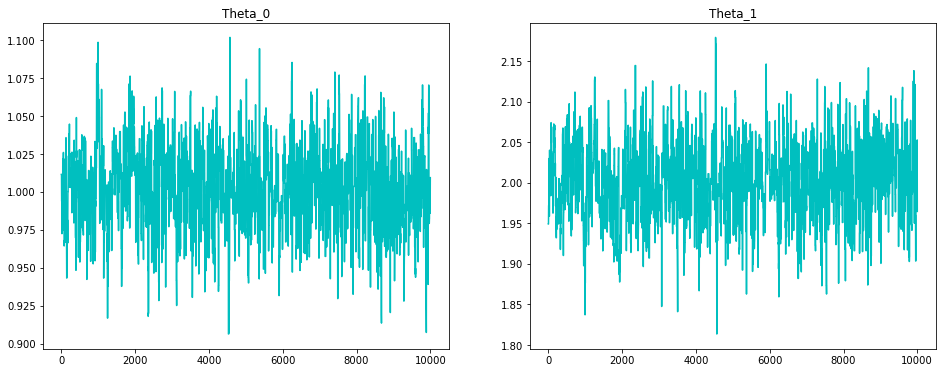

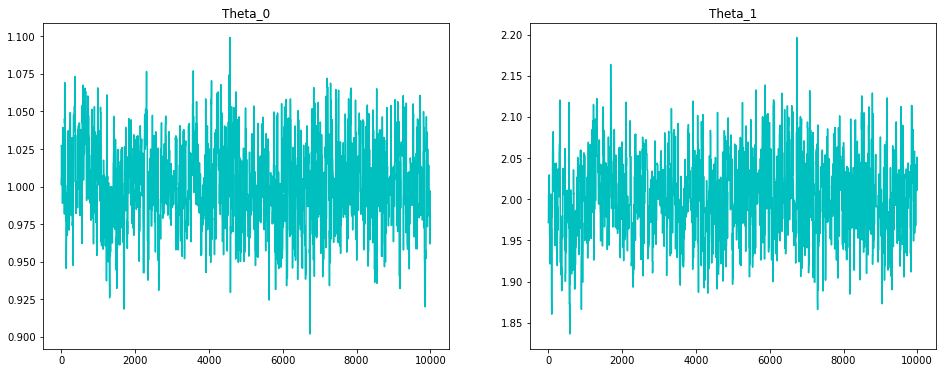

In [10]:
burnin = 2000
parameters = tda.get_parameters(my_chain)
for p in parameters:
    tda.plot_parameters(p, burnin=burnin)

In [11]:
tda.compute_R_hat(parameters)

array([1.00684143, 1.00224952])

In [12]:
tda.compute_ESS(parameters)

array([159.31513317, 290.49688437])